## UVA EI EDA!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/rachelholman/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('county-data.csv')
data

,County,Year,Income,DSCI,Precip,Temp,Count,Percentage,Crop,Coal,Petroleum Products,Natural Gas,Total,Sector,Population
0,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,0.000000,2.589419,4.384754,6.974173,Residential,33970
1,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,0.187220,1.071147,3.685261,4.943629,Commercial,33970
2,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,7.667449,5.134328,3.550514,16.352290,Industrial,33970
3,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,0.000000,51.240860,0.473097,51.713958,Transportation,33970
4,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,31.632810,0.901568,4.244781,36.779160,Electic,33970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18406,Wise,2022,41103,38.807692,52.26,53.1,104,0.000039,Woody_Wetlands,NaN,NaN,NaN,NaN,NaN,35421
18407,Wise,2022,41103,38.807692,52.26,53.1,42,0.000016,Herbaceous_Wetlands,NaN,NaN,NaN,NaN,NaN,35421
18408,Wise,2022,41103,38.807692,52.26,53.1,5,0.000002,Triticale,NaN,NaN,NaN,NaN,NaN,35421
18409,Wise,2022,41103,38.807692,52.26,53.1,17,0.000006,Dbl_Crop_WinWht/Corn,NaN,NaN,NaN,NaN,NaN,35421


In [3]:
by_county = data.groupby('County')

Simple line plots for the Income, DSCI, Precipitation, and Temperature by county.

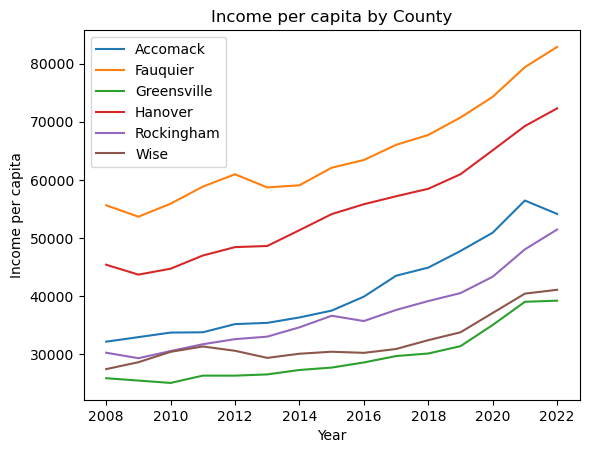

In [4]:
for category, county in by_county:
    plt.plot(county['Year'], county['Income'], label=category)

plt.xlabel('Year')
plt.ylabel('Income per capita')
plt.title('Income per capita by County')
plt.legend()
plt.show()

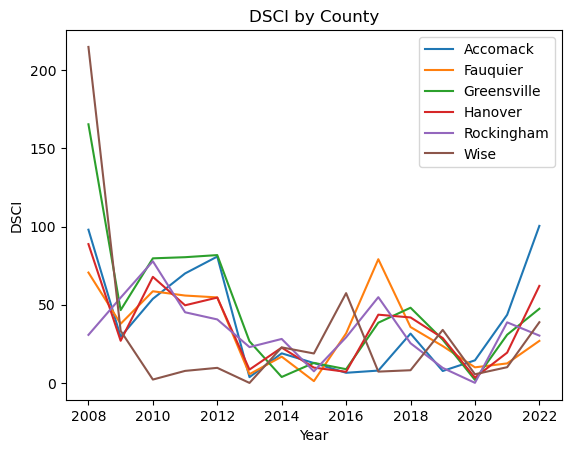

In [5]:
for category, county in by_county:
    plt.plot(county['Year'], county['DSCI'], label=category)

plt.xlabel('Year')
plt.ylabel('DSCI')
plt.title('DSCI by County')
plt.legend()
plt.show()

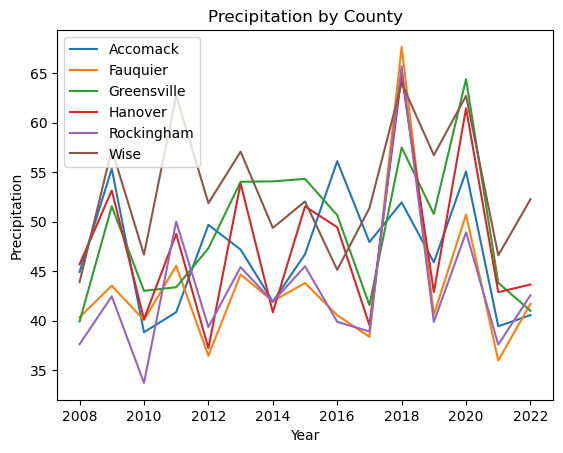

In [6]:
for category, county in by_county:
    plt.plot(county['Year'], county['Precip'], label=category)

plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Precipitation by County')
plt.legend()
plt.show()

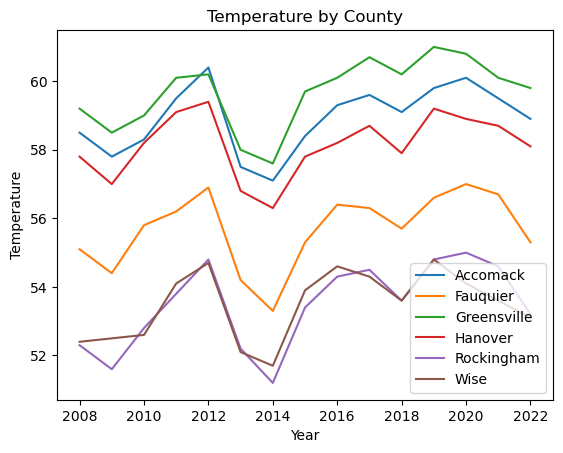

In [7]:
for category, county in by_county:
    plt.plot(county['Year'], county['Temp'], label=category)

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature by County')
plt.legend()
plt.show()

Replace map for crops

In [8]:
crop_counts = data['Crop'].value_counts().head(30)
crop_counts

Corn                        510
Other_Hay/Non_Alfalfa       510
Grassland/Pasture           510
Mixed_Forest                510
Evergreen_Forest            510
Deciduous_Forest            510
Barren                      510
Developed/High_Intensity    510
Developed/Med_Intensity     510
Developed/Low_Intensity     510
Developed/Open_Space        510
Open_Water                  510
Shrubland                   504
Soybeans                    504
Fallow/Idle_Cropland        486
Alfalfa                     486
Woody_Wetlands              462
Herbaceous_Wetlands         450
Sorghum                     450
Dbl_Crop_WinWht/Soybeans    450
Winter_Wheat                444
Dbl_Crop_WinWht/Corn        402
Millet                      390
Dbl_Crop_Barley/Soybeans    389
Sod/Grass_Seed              360
Rye                         360
Barley                      347
Dbl_Crop_Soybeans/Oats      341
Dbl_Crop_Barley/Corn        339
Other_Crops                 323
Name: Crop, dtype: int64

<Axes: >

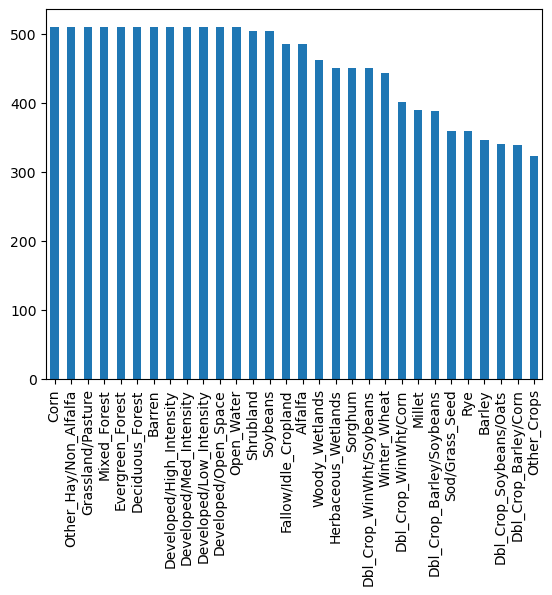

In [9]:
crop_counts.plot(kind='bar')

From this we're looking at Forests, Crops, Wetlands, and Developed mostly

In [10]:
crop_replace_map = {
    'Corn': 'Crops',
    'Other_Hay/Non_Alfalfa': 'Crops',
    'Soybeans': 'Crops',
    'Alfalfa':'Crops',
    'Sorghum':'Crops',
    'Dbl_Crop_WinWht/Soybeans':'Crops',
    'Winter_Wheat':'Crops',
    'Dbl_Crop_WinWht/Corn':'Crops',
    'Millet':'Crops',
    'Dbl_Crop_Barley/Soybeans':'Crops',
    'Rye':'Crops',
    'Barley':'Crops',
    'Dbl_Crop_Soybeans/Oats ':'Crops',
    'Dbl_Crop_Barley/Corn':'Crops',
    'Other_Crops':'Crops',
    'Dbl_Crop_WinWht/Sorghum':'Crops',
    'Oats':'Crops',
    'Cotton':'Crops',
    'Apples':'Crops',
    'Pumpkins':'Crops',
    'Tobacco':'Crops',
    'Sunflower':'Crops',
    'Christmas_Trees':'Crops',
    'Triticale':'Crops',
    'Grapes':'Crops',
    'Sweet_Corn':'Crops',
    'Peanuts':'Crops',
    'Dry_Beans':'Crops',
    'Dbl_Crop_Oats/Corn':'Crops',
    'Potatoes':'Crops',
    'Peaches':'Crops',
    'Misc_Vegs_&_Fruits':'Crops',
    'Dbl_Crop_Barley/Sorghum':'Crops',
    'Sweet_Potatoes':'Crops',
    'Squash':'Crops',
    'Tomatoes':'Crops',
    'Strawberries':'Crops',
    'Broccoli':'Crops',
    'Watermelons':'Crops',
    'Other_Tree_Crops':'Crops',
    'Canola':'Crops',
    'Cantaloupes':'Crops',
    'Cabbage':'Crops',
    'Vetch':'Crops',
    'Walnuts':'Crops',
    'Rape_Seed':'Crops',
    'Dbl_Crop_WinWht/Cotton':'Crops',
    'Dbl_Crop_Corn/Soybeans':'Crops',
    'Cherries':'Crops',
    'Buckwheat':'Crops',
    'Dbl_Crop_Soybeans/Cotton':'Crops',
    'Switchgrass':'Crops',
    'Cucumbers':'Crops',
    'Cranberries':'Crops',
    'Pop_or_Orn_Corn':'Crops',
    'Radishes':'Crops',
    'Greens':'Crops',
    'Pears':'Crops',
    'Peppers':'Crops',
    'Pecans':'Crops',
    'Peas':'Crops',
    'Durum_Wheat':'Crops',
    'Gourds':'Crops',
    'Spring_Wheat':'Crops',
    'Speltz':'Crops',
    'Turnips':'Crops',

    'Grassland/Pasture': 'Grassland',
    'Sod/Grass_Seed': 'Grassland',
    'Switchgrass':'Grassland',

    'Mixed_Forest': 'Forest',
    'Evergreen_Forest': 'Forest',
    'Deciduous_Forest': 'Forest',

    'Barren': 'Barren',
    'Fallow/Idle_Cropland': 'Barren',

    'Developed/High_Intensity': 'Developed',
    'Developed/Med_Intensity': 'Developed',
    'Developed/Low_Intensity': 'Developed',
    'Developed/Open_Space': 'Developed',

    'Open_Water': 'Open_Water',
    'Shrubland': 'Shrubland',

    'Woody_Wetlands':'Wetlands',
    'Herbaceous_Wetlands':'Wetlands',

    'Aquaculture':'Aquaculture'

}


data_grouped = data


data_grouped['Crop_cat'] = data_grouped['Crop'].map(crop_replace_map)

data_grouped

,County,Year,Income,DSCI,Precip,Temp,Count,Percentage,Crop,Coal,Petroleum Products,Natural Gas,Total,Sector,Population,Crop_cat
0,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,0.000000,2.589419,4.384754,6.974173,Residential,33970,Crops
1,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,0.187220,1.071147,3.685261,4.943629,Commercial,33970,Crops
2,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,7.667449,5.134328,3.550514,16.352290,Industrial,33970,Crops
3,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,0.000000,51.240860,0.473097,51.713958,Transportation,33970,Crops
4,Accomack,2008,32179,97.962264,44.92,58.5,140068,0.019369,Corn,31.632810,0.901568,4.244781,36.779160,Electic,33970,Crops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18406,Wise,2022,41103,38.807692,52.26,53.1,104,0.000039,Woody_Wetlands,NaN,NaN,NaN,NaN,NaN,35421,Wetlands
18407,Wise,2022,41103,38.807692,52.26,53.1,42,0.000016,Herbaceous_Wetlands,NaN,NaN,NaN,NaN,NaN,35421,Wetlands
18408,Wise,2022,41103,38.807692,52.26,53.1,5,0.000002,Triticale,NaN,NaN,NaN,NaN,NaN,35421,Crops
18409,Wise,2022,41103,38.807692,52.26,53.1,17,0.000006,Dbl_Crop_WinWht/Corn,NaN,NaN,NaN,NaN,NaN,35421,Crops


In [11]:
data_grouped['County'].value_counts()

Hanover        3590
Fauquier       3481
Rockingham     3478
Greensville    3226
Accomack       2823
Wise           1813
Name: County, dtype: int64

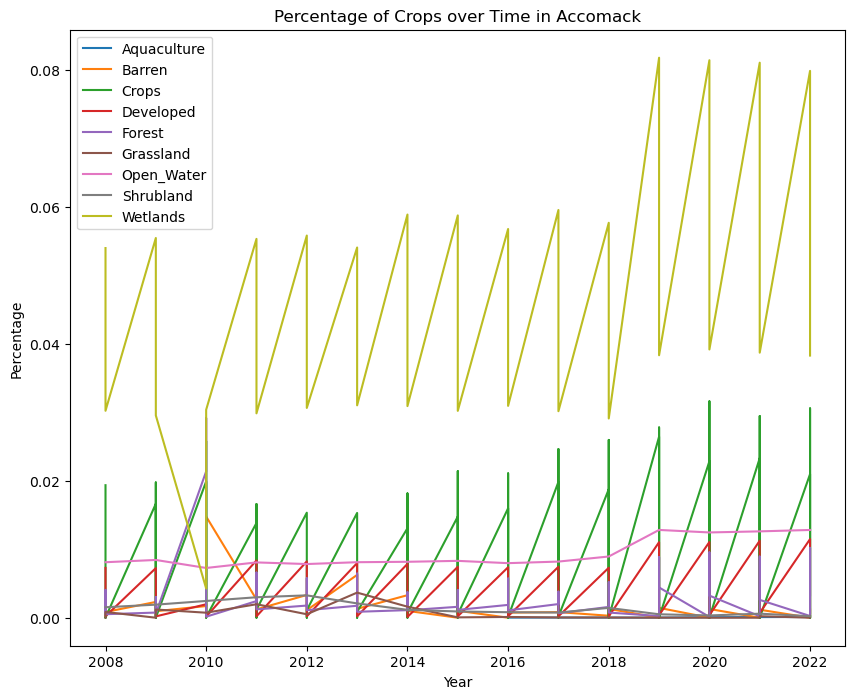

In [12]:
# Filter to Accomack county
accomack_county_data = data_grouped[data_grouped['County'] == 'Accomack']

plt.figure(figsize=(10, 8))
for crop_cat, group_data in accomack_county_data.groupby('Crop_cat'):
    plt.plot(group_data['Year'], group_data['Percentage'], label=crop_cat)


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Crops over Time in Accomack')
plt.legend()

plt.show()

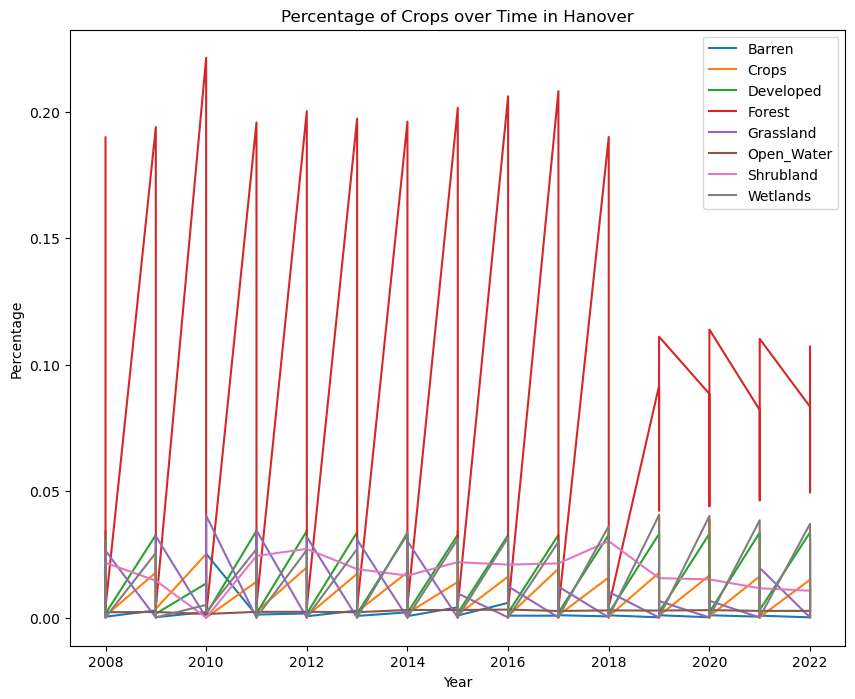

In [13]:
# Filter to Hanover county
hanover_county_data = data_grouped[data_grouped['County'] == 'Hanover']

plt.figure(figsize=(10, 8))
for crop_cat, group_data in hanover_county_data.groupby('Crop_cat'):
    plt.plot(group_data['Year'], group_data['Percentage'], label=crop_cat)


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Crops over Time in Hanover')
plt.legend()

plt.show()

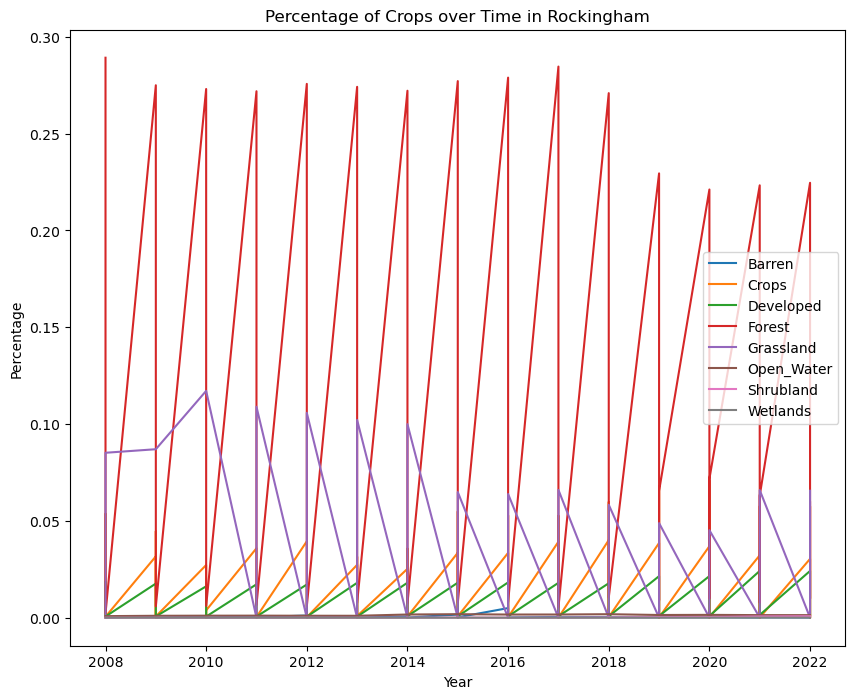

In [14]:
# Filter to Rockingham county
rockingham_county_data = data_grouped[data_grouped['County'] == 'Rockingham']

plt.figure(figsize=(10, 8))
for crop_cat, group_data in rockingham_county_data.groupby('Crop_cat'):
    plt.plot(group_data['Year'], group_data['Percentage'], label=crop_cat)


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Crops over Time in Rockingham')
plt.legend()

plt.show()

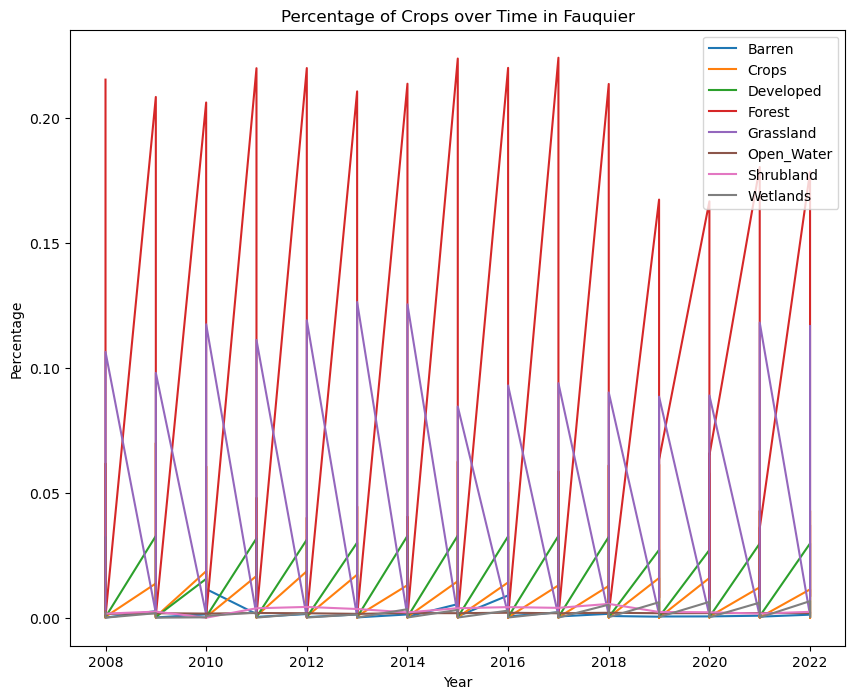

In [15]:
# Filter to Fauquier county
faquier_county_data = data_grouped[data_grouped['County'] == 'Fauquier']

plt.figure(figsize=(10, 8))
for crop_cat, group_data in faquier_county_data.groupby('Crop_cat'):
    plt.plot(group_data['Year'], group_data['Percentage'], label=crop_cat)


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Crops over Time in Fauquier')
plt.legend()

plt.show()

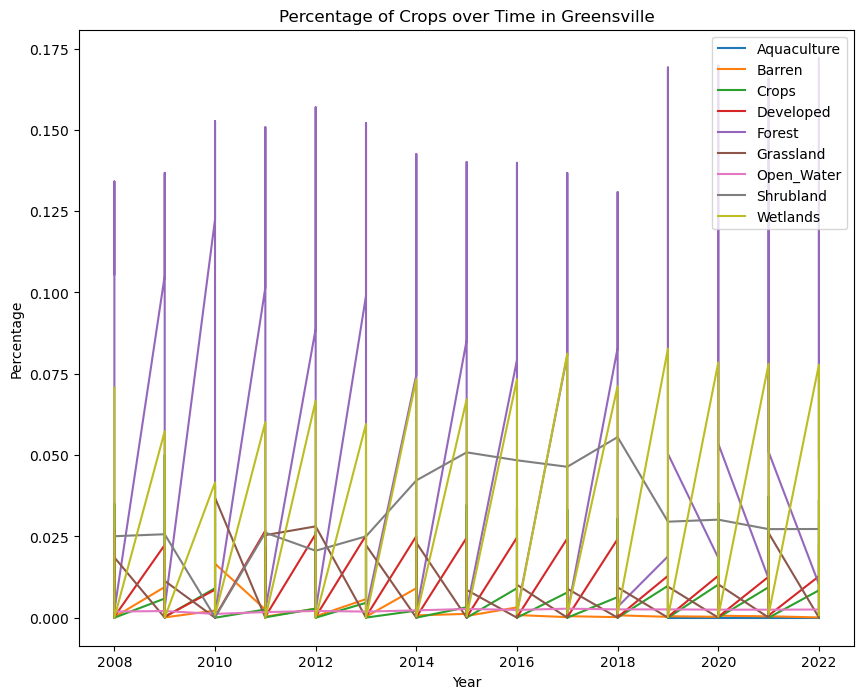

In [16]:
# Filter to Greensville county
greensville_county_data = data_grouped[data_grouped['County'] == 'Greensville']

plt.figure(figsize=(10, 8))
for crop_cat, group_data in greensville_county_data.groupby('Crop_cat'):
    plt.plot(group_data['Year'], group_data['Percentage'], label=crop_cat)


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Crops over Time in Greensville')
plt.legend()

plt.show()

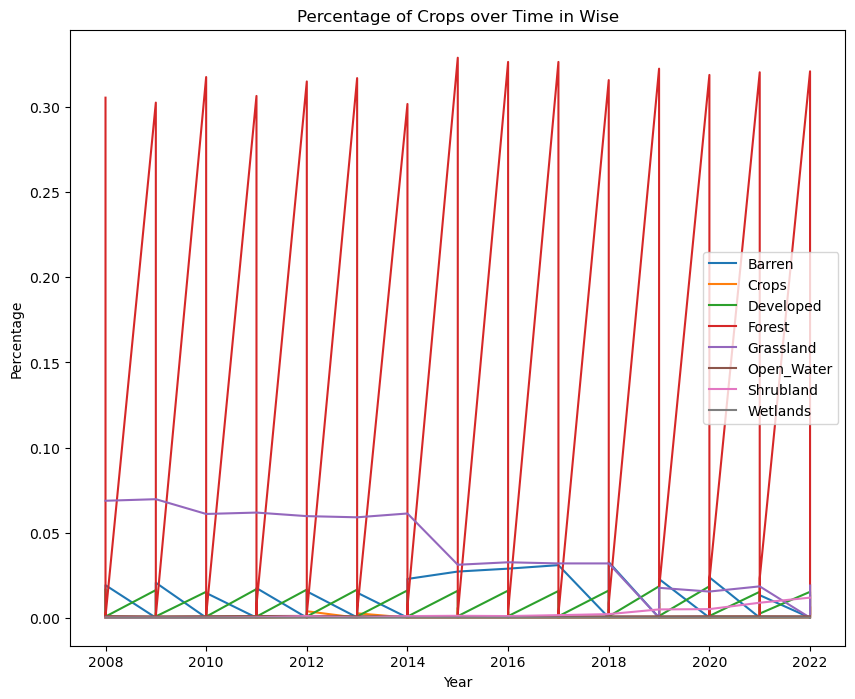

In [17]:
# Filter to Wise county
wise_county_data = data_grouped[data_grouped['County'] == 'Wise']

plt.figure(figsize=(10, 8))
for crop_cat, group_data in wise_county_data.groupby('Crop_cat'):
    plt.plot(group_data['Year'], group_data['Percentage'], label=crop_cat)


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Crops over Time in Wise')
plt.legend()

plt.show()

## CO2 Emissions

In [18]:
emissions = ['County','Year','Natural Gas', 'Petroleum Products', 'Coal', 'Total']

emissions_data = data[emissions].dropna()

emissions_data

by_county_emissions = emissions_data.groupby('County')

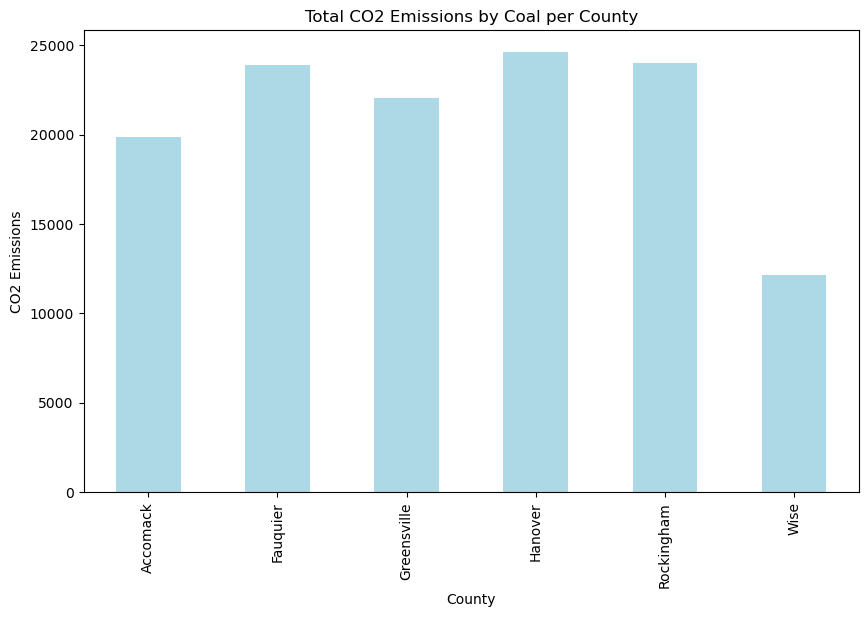

In [19]:
coal_sum = emissions_data.groupby('County')['Coal'].sum()

coal_sum.plot(kind='bar', color = 'lightblue', figsize=(10, 6))
plt.title('Total CO2 Emissions by Coal per County')
plt.xlabel('County')
plt.ylabel('CO2 Emissions')
plt.show()

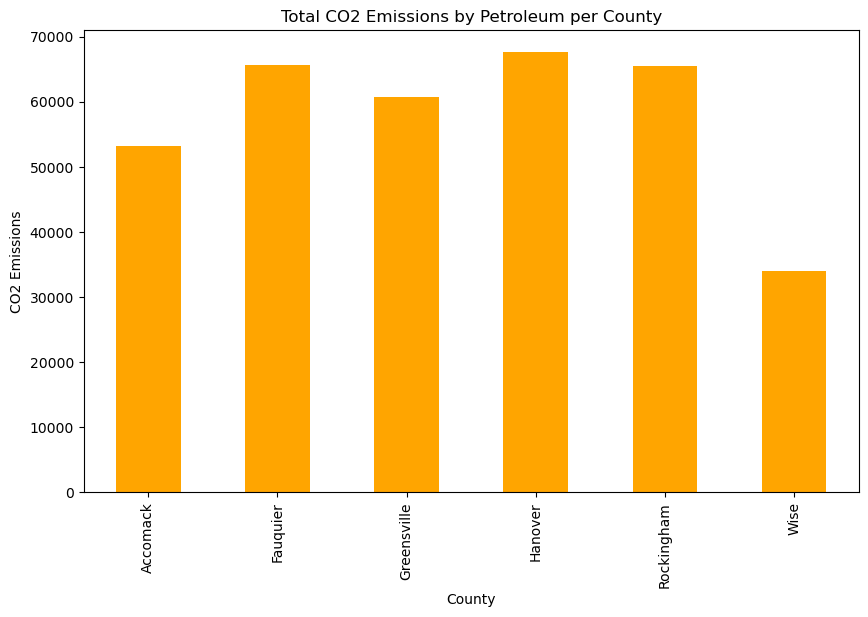

In [20]:
petro_sum = emissions_data.groupby('County')['Petroleum Products'].sum()

petro_sum.plot(kind='bar', color = 'Orange', figsize=(10, 6))
plt.title('Total CO2 Emissions by Petroleum per County')
plt.xlabel('County')
plt.ylabel('CO2 Emissions')
plt.show()

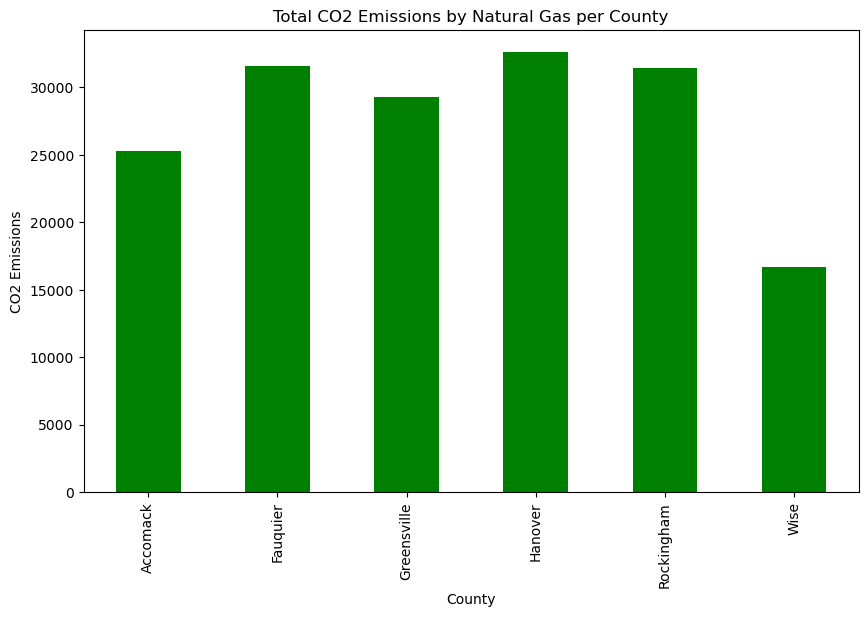

In [21]:
natgas_sum = emissions_data.groupby('County')['Natural Gas'].sum()

natgas_sum.plot(kind='bar', color = 'green', figsize=(10, 6))
plt.title('Total CO2 Emissions by Natural Gas per County')
plt.xlabel('County')
plt.ylabel('CO2 Emissions')
plt.show()

/var/folders/bn/jw4b363n6cz8jy9jwmhp7q0c0000gn/T/ipykernel_33277/130972872.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_by_year = emissions_data.groupby('Year').sum()


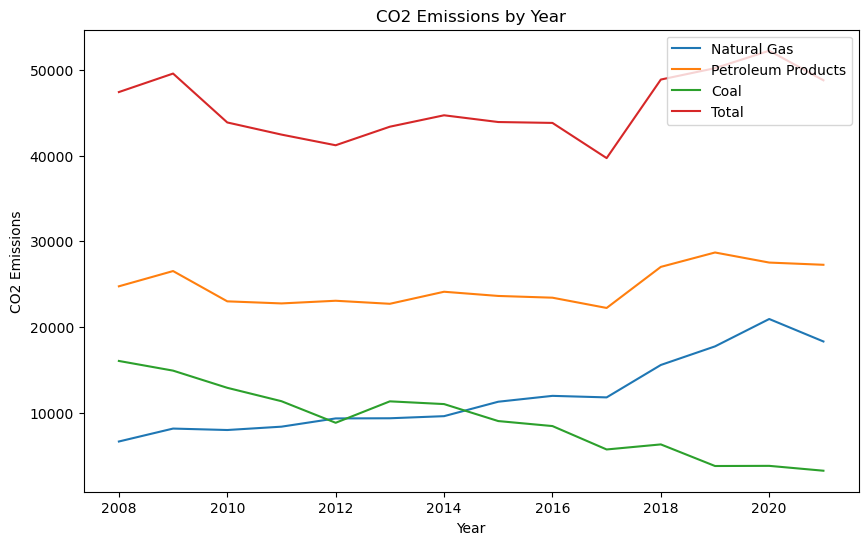

In [22]:
#sum_by_year = emissions_data.groupby('Year')['Total'].sum()
sum_by_year = emissions_data.groupby('Year').sum()
sum_by_year.plot(kind='line', figsize=(10, 6))
plt.title('CO2 Emissions by Year')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show();

This part needs rethinking  -- To do :)

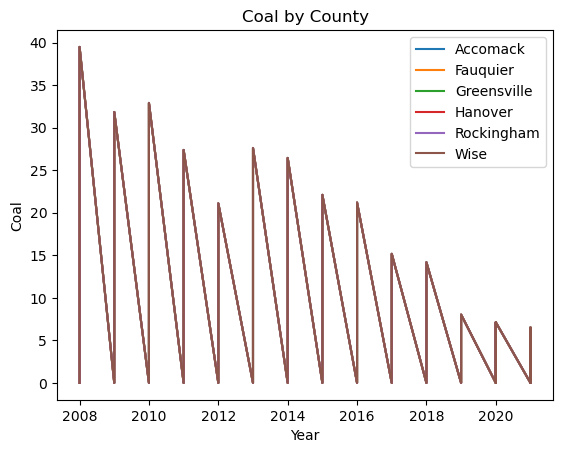

In [23]:
for category, county in by_county_emissions:
    plt.plot(county['Year'], county['Coal'], label=category)

plt.xlabel('Year')
plt.ylabel('Coal')
plt.title('Coal by County')
plt.legend()
plt.show()

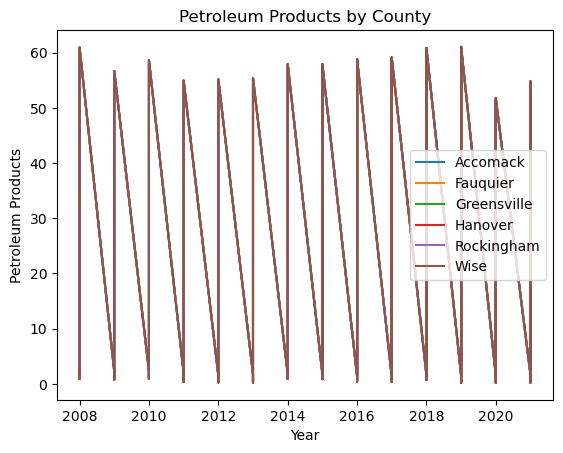

In [24]:
for category, county in by_county_emissions:
    plt.plot(county['Year'], county['Petroleum Products'], label=category)

plt.xlabel('Year')
plt.ylabel('Petroleum Products')
plt.title('Petroleum Products by County')
plt.legend()
plt.show()

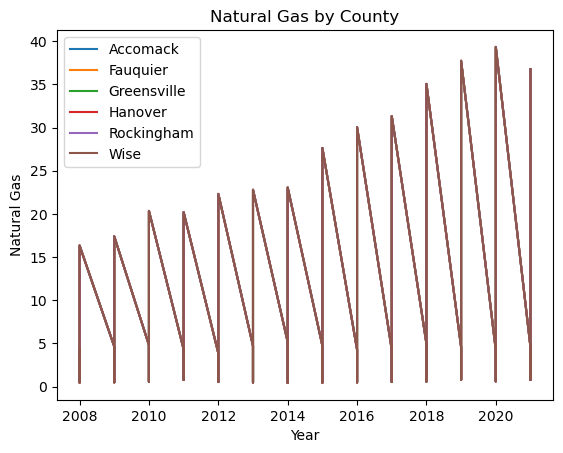

In [25]:
for category, county in by_county_emissions:
    plt.plot(county['Year'], county['Natural Gas'], label=category)

plt.xlabel('Year')
plt.ylabel('Natural Gas')
plt.title('Natural Gas by County')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Population over Time in VA By County')

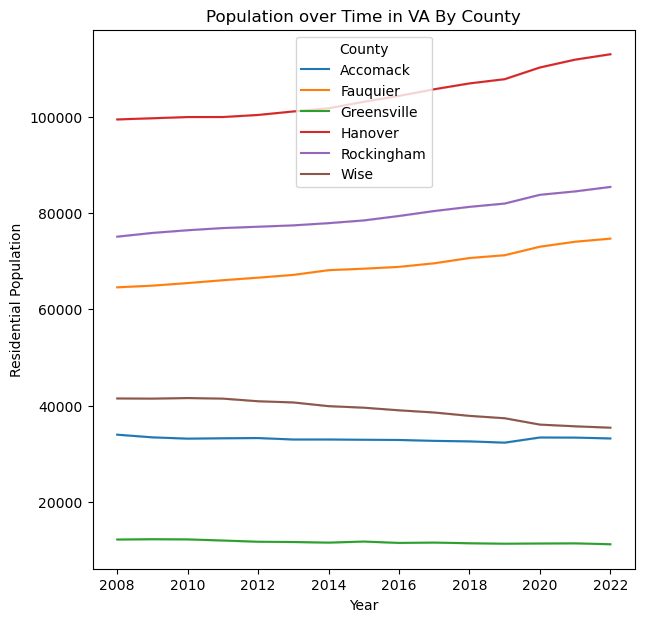

In [27]:
plt.figure(figsize=(7,7))
sns.lineplot(x='Year', y='Population', hue='County',
             data=data)
plt.xlabel('Year')
plt.ylabel('Residential Population')
plt.title('Population over Time in VA By County')